In [3]:
import plotly.graph_objs as go
import dask_ml.datasets as dask_datasets
import sklearn.datasets as sk_datasets
import dask.dataframe as dd

In [6]:
def make_dataset_and_compute_correlation(func, **kwargs):
    X, y = func(**kwargs) 
    ddf_features = dd.from_array(X)
    
    corr = ddf_features.corr().compute()
    
    return corr

In [8]:
dask_corr = make_dataset_and_compute_correlation(dask_datasets.make_classification, 
                                                 n_samples=10000, n_informative=12, 
                                                 n_redundant=18, n_features=30, 
                                                 chunks=100)

In [9]:
sk_corr = make_dataset_and_compute_correlation(sk_datasets.make_classification, 
                                               n_samples=10000, n_informative=12, 
                                               n_redundant=18, n_features=30)

In [78]:
ddf_feature = dd.from_array(X)

In [79]:
corr = ddf_feature.corr().compute()

In [80]:
fig = go.FigureWidget()
heat_map = fig.add_heatmap(z=corr.values)
fig

FigureWidget({
    'data': [{'type': 'heatmap',
              'uid': 'b0fe94a6-9194-11e8-87dd-acde48001122',
 …

In [81]:
from sklearn.cluster.bicluster import SpectralBiclustering

In [82]:
from sklearn.manifold.mds import MDS

In [83]:
import numpy as np

In [84]:
mds = MDS(dissimilarity='precomputed')

In [85]:
data = mds.fit_transform((1-corr.values))

In [86]:
data.shape

(30, 2)

In [87]:
fig = go.FigureWidget()
scatter = fig.add_scattergl(x=data[:,0], y=data[:,1], text=[idx for idx in range(data.shape[0])], mode='markers')
fig.layout.hovermode = 'closest'
fig

FigureWidget({
    'data': [{'mode': 'markers',
              'text': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 1…

In [88]:
import matplotlib.pyplot as plt
import networkx as nx

In [89]:
corr.columns.values

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [90]:
threshold=0.8

In [102]:
edges = []
for i_row, row in enumerate(corr.columns.values):
    for i_col, col in enumerate(corr.columns.values[i_row+1:]):
        value = corr.values[i_row,i_col]
        if value > threshold:
            distance = 1-abs(value)
            distance = distance if distance>0 else 1e-4
            edges.append((row, col, {'weight':distance}))

In [103]:
len(edges)

15

In [104]:
edges

[(0, 1, {'weight': 0.0001}),
 (1, 3, {'weight': 2.3314683517128287e-15}),
 (2, 5, {'weight': 8.881784197001252e-16}),
 (3, 7, {'weight': 3.3306690738754696e-16}),
 (4, 9, {'weight': 2.1094237467877974e-15}),
 (5, 11, {'weight': 0.0001}),
 (6, 13, {'weight': 2.3314683517128287e-15}),
 (7, 15, {'weight': 1.6653345369377348e-15}),
 (8, 17, {'weight': 3.3306690738754696e-15}),
 (9, 19, {'weight': 4.440892098500626e-15}),
 (10, 21, {'weight': 0.0001}),
 (11, 23, {'weight': 4.218847493575595e-15}),
 (12, 25, {'weight': 0.0001}),
 (13, 27, {'weight': 2.9976021664879227e-15}),
 (14, 29, {'weight': 9.992007221626409e-16})]

In [105]:
G = nx.Graph()

In [106]:
G.add_nodes_from(corr.columns.values)

In [107]:
G.add_edges_from(edges)

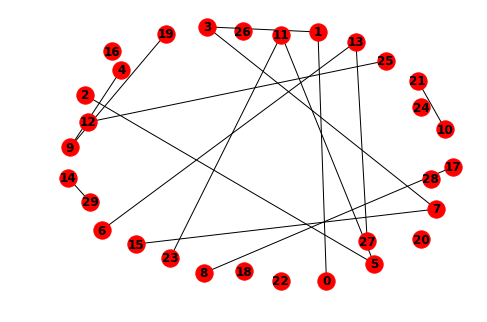

In [108]:
nx.draw(G, with_labels=True, font_weight='bold')

In [109]:
pos = nx.spring_layout(G, k=5, iterations=1000)

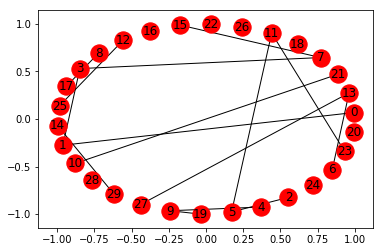

In [110]:
nx.draw_networkx(G, pos=pos)

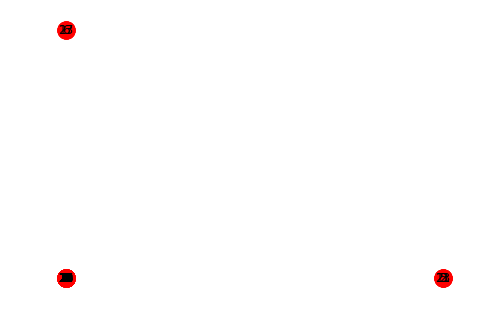

In [111]:
nx.draw_spectral(G, with_labels=True)

In [49]:
layt = nx.spring_layout(G)

In [114]:
for graph in nx.connected_component_subgraphs(G):
    print(graph.nodes())

[0, 1, 3, 7, 15]
[2, 11, 5, 23]
[9, 19, 4]
[27, 13, 6]
[8, 17]
[10, 21]
[25, 12]
[29, 14]
[16]
[18]
[20]
[22]
[24]
[26]
[28]
